In [23]:
# standard python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
from math import sqrt
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
import statsmodels.api as sm


# my modules
import src.env as env
import src.wrangle as wr
import src.evaluate as evaluate 

# setting random seed to 7
np.random.seed(7)

# turning off red warnings
import warnings
warnings.filterwarnings("ignore")

## Exercises

### 1. Select a dataset with a continuous target variable.

- using zillow 2017 dataset

In [2]:
# using a small sample for regression exploration
df = wr.clean_zillow_2017(small=True)

In [5]:
df.head()

,bedrooms,baths,sq_feet,tax_value,year_built,tax_amount,fips
739421,3,1,1122,271709,1947,3429,6037
1207444,2,2,1198,311634,1941,3755,6037
289843,4,3,3385,1616623,1976,17548,6059
2115765,3,2,1612,335497,1967,4552,6037
50238,2,1,1061,243321,1949,3159,6037


### 2. Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

In [7]:
# develop our sample further by dividing into train, validate, and test samples
x_train, y_train, x_validate, y_validate, x_test, y_test = wr.x_y(df, 'tax_value')

### 3. Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

In [79]:
x_train.isnull().sum()

bedrooms      0
baths         0
sq_feet       0
year_built    0
tax_amount    0
fips          0
dtype: int64

In [10]:
# make the model
lm = lr()
# fit data to simple regression
lm.fit(x_train, y_train)

In [84]:
predictions = pd.DataFrame()

In [85]:
predictions['target'] = y_train

In [86]:
# produce baseline predictions based on the mean of the tax values
predictions['baseline_mean'] = round(y_train.mean(),3)
predictions['baseline_median'] = y_train.median()

In [87]:
predictions.head()

,target,baseline_mean,baseline_median
1670342,170455,398891.445,322000.0
931622,475000,398891.445,322000.0
483849,309343,398891.445,322000.0
977768,791650,398891.445,322000.0
1713902,452499,398891.445,322000.0


In [88]:
# make the model
lm = lr()
# fit data to simple regression
lm.fit(x_train, y_train)

LinearRegression()

In [91]:
# make predictions,
simple_model = lm.predict(x_train)

In [46]:
predictions = predictions[['baseline_mean','baseline_median','simple_model']]

In [92]:
len(x_train), len(y_train), len(predictions), len(simple_model)

(586612, 586612, 586612, 586612)

In [22]:
# examine the coefficients
x_train.columns, lm.coef_

(Index(['bedrooms', 'baths', 'sq_feet', 'year_built', 'tax_amount', 'fips'], dtype='object'),
 array([-4255.90774888, -1563.6319801 ,    16.79795672,  -369.57700426,
           82.90084401,   813.27468797]))

In [28]:
y_train.head()

1670342    170455
931622     475000
483849     309343
977768     791650
1713902    452499
Name: tax_value, dtype: int64

Text(0, 0.5, 'Number of homes')

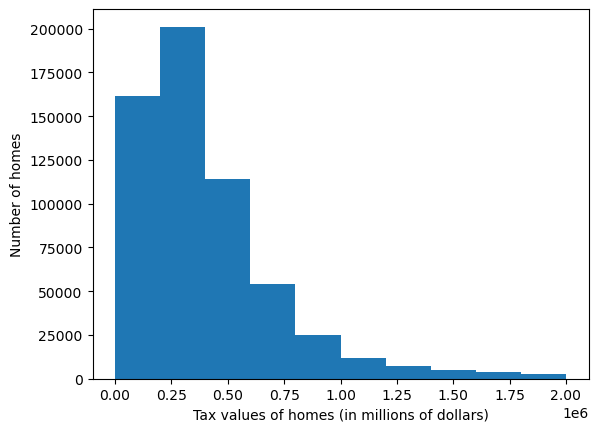

In [31]:
plt.hist(y_train)
plt.xlabel('Tax values of homes (in millions of dollars)')
plt.ylabel('Number of homes')

In [48]:
evaluate.regression_errors(y_train, predictions['baseline_mean'])

ValueError: Found input variables with inconsistent numbers of samples: [586612, 251406]

In [49]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 586612 entries, 1670342 to 85105
Series name: tax_value
Non-Null Count   Dtype
--------------   -----
586612 non-null  int64
dtypes: int64(1)
memory usage: 9.0 MB


In [50]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251406 entries, 0 to 251405
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   baseline_mean    251406 non-null  float64
 1   baseline_median  251406 non-null  float64
 2   simple_model     251406 non-null  float64
dtypes: float64(3)
memory usage: 5.8 MB
